## Logistic Regression with cost and gradient descent Using scipy.optimize
*opt.fmin_tnc()*
### Includes plotting

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
path = 'https://raw.githubusercontent.com/Gurubux/SelfStudyNotes/master/Linear_Regression/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Text(0, 0.5, 'Exam 1 Score')

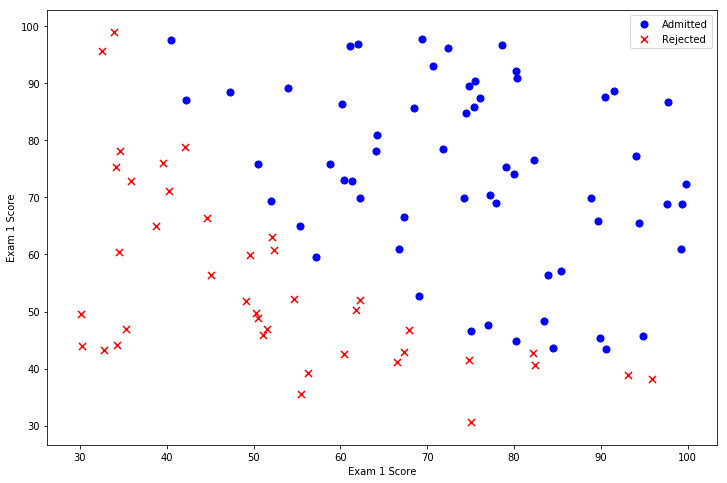

In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 1 Score')

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad
  
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [0]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

In [0]:

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#print(X.head())
#print(y.head())
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [0]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)

In [9]:
cost(theta, X, y)

0.6931471805599453

In [10]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
theta_min = np.matrix(result[0])
print(result)
cost(result[0], X, y)


(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


0.20349770158947458

In [11]:
predictions = predict(theta_min, X)
predictions[:5],type(predictions)

([0, 0, 0, 1, 1], list)

In [12]:
X[:5],type(X)

(array([[ 1.        , 34.62365962, 78.02469282],
        [ 1.        , 30.28671077, 43.89499752],
        [ 1.        , 35.84740877, 72.90219803],
        [ 1.        , 60.18259939, 86.3085521 ],
        [ 1.        , 79.03273605, 75.34437644]]), numpy.ndarray)

In [13]:
theta_min[:5],type(theta_min)

(matrix([[-25.16131863,   0.20623159,   0.20147149]]), numpy.matrix)

In [14]:
(X * theta_min.T)[:5]

matrix([[ -2.30107548],
        [-10.07165177],
        [ -3.08073639],
        [  4.63894671],
        [  6.31747157]])

In [15]:
import seaborn as sns
w = np.squeeze(np.asarray((X * theta_min.T).reshape(1,-1)))
t = np.squeeze(np.asarray(sigmoid(X * theta_min.T).reshape(1,-1)))
new_df = pd.DataFrame({"w":w,"t":t,"predictions":predictions})
new_df.head()

,w,t,predictions
0,-2.301075,0.091034,0
1,-10.071652,0.000042,0
2,-3.080736,0.043909,0
3,4.638947,0.990425,1
4,6.317472,0.998199,1


In [16]:
w[:5]

array([ -2.30107548, -10.07165177,  -3.08073639,   4.63894671,
         6.31747157])

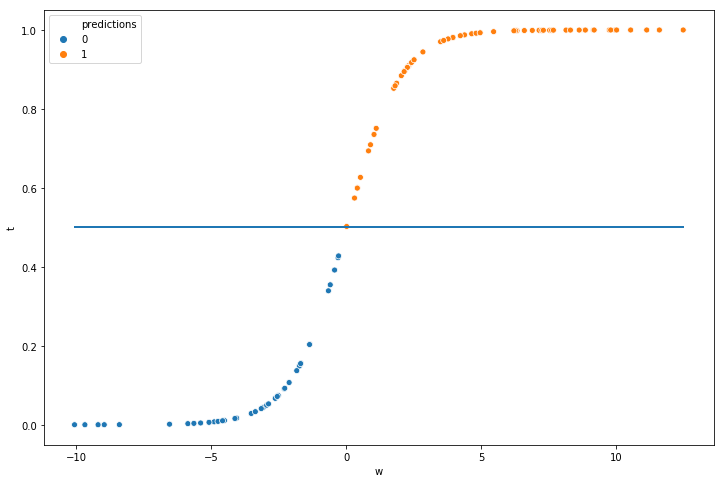

In [17]:

fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x='w', y='t',
              hue='predictions', data=new_df); 
ax.plot([np.min(w), np.max(w)], [0.5, 0.5], linewidth=2)

[-25.16131863   0.20623159   0.20147149]
-25.16131862777957 0.20623158859990537 0.2014714861690025


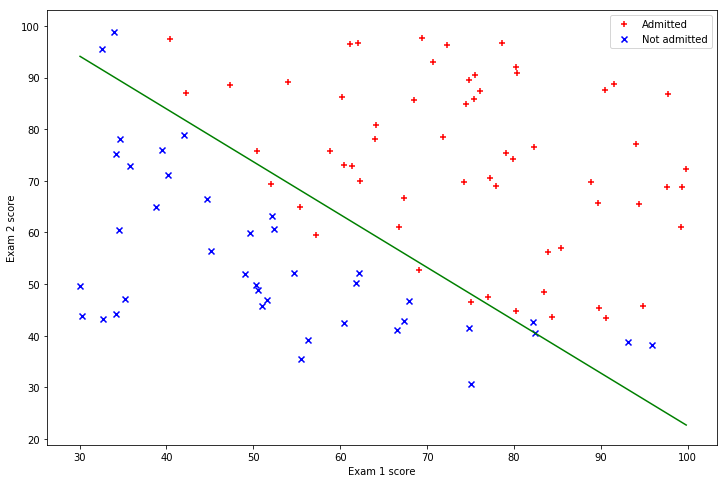

In [18]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
print(np.squeeze(np.asarray(theta_min.reshape(1,-1))))
theta_min = np.squeeze(np.asarray(theta_min.reshape(1,-1)))
print(theta_min[0],theta_min[1],theta_min[2])
y_value=-(theta_min[0] +theta_min[1]*x_value)/theta_min[2]

ax.plot(x_value,y_value, "g")
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.legend(loc=0)

In [19]:
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


**References** :

[*link 1*](https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LogisticRegression/ML_LogisticRegression.ipynb)

[*John Wittenauer*](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/)

[*Benjamin Lau*](https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-regularized-logistic-regression-lasso-regression-721f311130fb)

In [0]:
data.head()
data = data.iloc[:,1:]

# Assumptions and analysys steps

## Assumption Of Continuous IVs Being Linearly Related To The **Log Odds**

Text(0.5, 1.0, 'Exam 1 Log Odds Linear Plot')

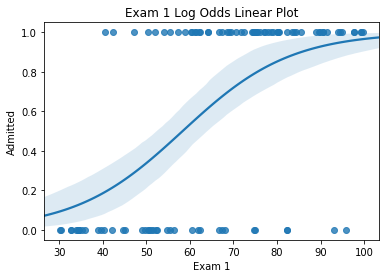

In [36]:
sns.regplot(x= 'Exam 1', y= 'Admitted', data= data, logistic= True).set_title("Exam 1 Log Odds Linear Plot")
#gre.figure.savefig("gre log lin.png")

Text(0.5, 1.0, 'Exam 2 Log Odds Linear Plot')

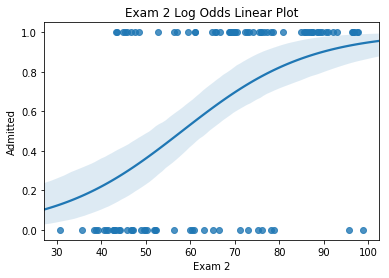

In [37]:
sns.regplot(x= 'Exam 2', y= 'Admitted', data= data, logistic= True).set_title("Exam 2 Log Odds Linear Plot")
#gpa.figure.savefig("gpa log lin.png")

## ASSUMPTION OF THE ABSENCE OF MULTICOLLINEARITY

In [0]:
from scipy.stats.stats import pearsonr,spearmanr
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor





### VIF

In [44]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif["features"] = data.columns
vif

,VIF Factor,features
0,7.676457,Exam 1
1,7.151108,Exam 2
2,3.762641,Admitted


### pearsonr and spearmanr

In [45]:
pearsonr(data['Exam 1'], data['Exam 2'])

(-0.023664586253294567, 0.8152152827846564)

In [46]:
spearmanr(data['Exam 1'], data['Exam 2'])

SpearmanrResult(correlation=-0.0372997299729973, pvalue=0.7125481177278083)

### chi2_contingency

In [47]:
from scipy.stats import chi2_contingency
table = pd.crosstab(data['Exam 1'], data['Exam 2'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
#>>>Chi-square Statistic 9900.000 p_value 0.239

Chi-square Statistic 9900.000 p_value 0.239


### df.corr()

In [48]:
data.corr()

,Exam 1,Exam 2,Admitted
Exam 1,1.000000,-0.023665,0.574057
Exam 2,-0.023665,1.000000,0.512323
Admitted,0.574057,0.512323,1.000000


## ASSUMPTION OF LACK OF OUTLIERS

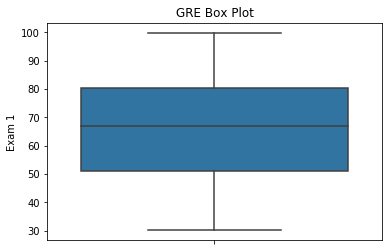

In [51]:
sns.boxplot(x= 'Exam 1', data= data, orient= 'v').set_title("Exam 1 Box Plot")

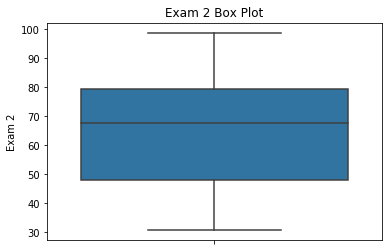

In [52]:
sns.boxplot(x= 'Exam 2', data= data, orient= 'v').set_title("Exam 2 Box Plot")